In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

In [2]:
# Cargar el conjunto de datos LFW
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
n_samples, n_features = X.shape

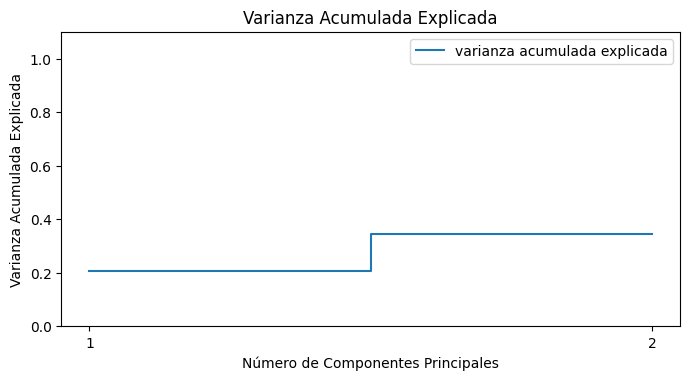

In [3]:

# Elegir una imagen específica para mostrar el proceso PCA
image_idx = 8
original_image = X[image_idx].reshape(50, 37)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Calcular la varianza acumulada de los componentes principales
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Visualizar los resultados de PCA
plt.figure(figsize=(7, 7))

# Varianza acumulada
plt.subplot(2, 1, 2)
# plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o')
plt.step(range(1, n_components + 1),explained_variance_ratio, where= 'mid', label='varianza acumulada explicada')
plt.title("Varianza Acumulada Explicada")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.xticks(range(1, n_components + 1))
plt.ylim(0, 1.1)

# plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='varianza individual explicada')
# plt.ylabel('Relación de varianza explicada')
# plt.xlabel('Componentes principales')
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

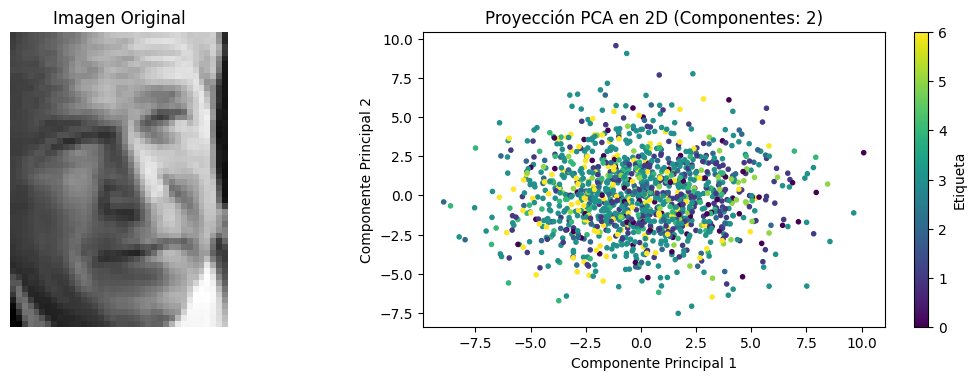

In [4]:
plt.figure(figsize=(12, 7))
# Imagen original
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

# Proyección PCA en 2D
plt.subplot(2, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=lfw_people.target, cmap="viridis", marker='.')
plt.colorbar(label="Etiqueta")
plt.title(f"Proyección PCA en 2D (Componentes: {n_components})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.show()